In [11]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
from tensorflow import keras
import tensorboard

from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten


In [2]:
mnist_tr_df = pd.read_csv('../../data/datasets/train.csv')
mnist_tr_df.head()
print(mnist_tr_df.shape)


In [48]:
mnist_ts_df = pd.read_csv('../../data/datasets/test.csv')
mnist_ts_df.head()
print(mnist_ts_df.shape)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(28000, 784)


In [2]:
train_df = pd.read_csv('../../data/datasets/train.csv')
y_tol = train_df.iloc[:, 0].values
X_tol = train_df.iloc[:, 1:].values

X_tol = X_tol.astype(np.float32).reshape(X_tol.shape[0],28,28,1)/255.0
y_tol = y_tol.astype(np.int32)
y_tol = keras.utils.to_categorical(y_tol, 10)

In [3]:
X_train, y_train = X_tol[:40000,:,:,:], y_tol[:40000,:]
X_test, y_test = X_tol[40000:,:,:,:], y_tol[40000:,:]


In [4]:
split_point = int(X_train.shape[0]*0.8)
X_tr ,y_tr = X_train[:split_point,:,:,:], y_train[ :split_point,:]
X_val, y_val = X_train[split_point:,:,:,:], y_train[ split_point:,:]

In [5]:
model = tf.keras.models.Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    Conv2D(64, (3,3), activation='relu', ),
    MaxPool2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])



In [6]:
model.compile(optimizer=SGD(learning_rate=0.01),
            loss='categorical_crossentropy',
            metrics = ['accuracy']
)

In [19]:
#writer = SummaryWriter('../../logs/convNet_2')
# Define the Keras TensorBoard callback.
tensorboard_callback = keras.callbacks.TensorBoard(log_dir='../../logs', update_freq=1, write_graph=True, embeddings_freq=10)

history = model.fit(
    X_tr, y_tr,
    batch_size=32,
    epochs=1,
    verbose=1,
    validation_data=(X_val, y_val),
    callbacks=[tensorboard_callback]
)

1000/1000 [==============================] - 53s 53ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0425 - val_accuracy: 0.9894


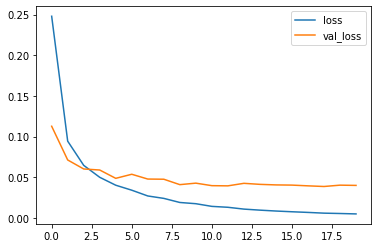

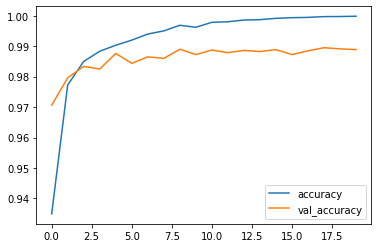

In [8]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [ ]:
model.save('../../data/models/convNet1.pb')